In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error as MSE
# from sklearn.ensemble import RandomForestRegressor

pcos = pd.read_csv('pcos_dataset.csv')
print("Shape of pcos dataframe: " + str(pcos.shape) + "\n")
pcos.head()

Shape of pcos dataframe: (1000, 6)



,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [54]:
for col in ["Menstrual_Irregularity", "Antral_Follicle_Count", "PCOS_Diagnosis"]: 
    print(pcos[col].unique())

[1 0]
[20 25 28 26  8  6 29 17  5 21 11 13 23 14 18 10 22  7 24 19 15 12 27  9
 16]
[0 1]


In [55]:
pcos['Menstrual_Irregularity'] = pcos['Menstrual_Irregularity'].astype('category')
pcos['PCOS_Diagnosis'] = pcos['PCOS_Diagnosis'].astype('category')

In [56]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1000 non-null   int64   
 1   BMI                        1000 non-null   float64 
 2   Menstrual_Irregularity     1000 non-null   category
 3   Testosterone_Level(ng/dL)  1000 non-null   float64 
 4   Antral_Follicle_Count      1000 non-null   int64   
 5   PCOS_Diagnosis             1000 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 33.6 KB


In [57]:
pcos.isna().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [58]:
pcos.describe()

,Age,BMI,Testosterone_Level(ng/dL),Antral_Follicle_Count
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,31.771000,26.38700,60.159500,17.469000
std,8.463462,4.93554,23.160204,7.069301
min,18.000000,18.10000,20.000000,5.000000
25%,24.000000,21.90000,41.700000,12.000000
50%,32.000000,26.40000,60.000000,18.000000
75%,39.000000,30.50000,80.300000,23.250000
max,45.000000,35.00000,99.800000,29.000000


## Exploring the data

We first plotted the distribution of all features, including the target feature PCOS_Diagnosis. These plots can give an indication of any potential class imbalance, or outliers in the dataset. 

We see that the target variable seems to be very imbalanced, because 80% of the dataset does not have a PCOS diagnosis. We will need to consider before using any machine learning models on the data and we will describe how we do that in the preprocessing section later in the report. 


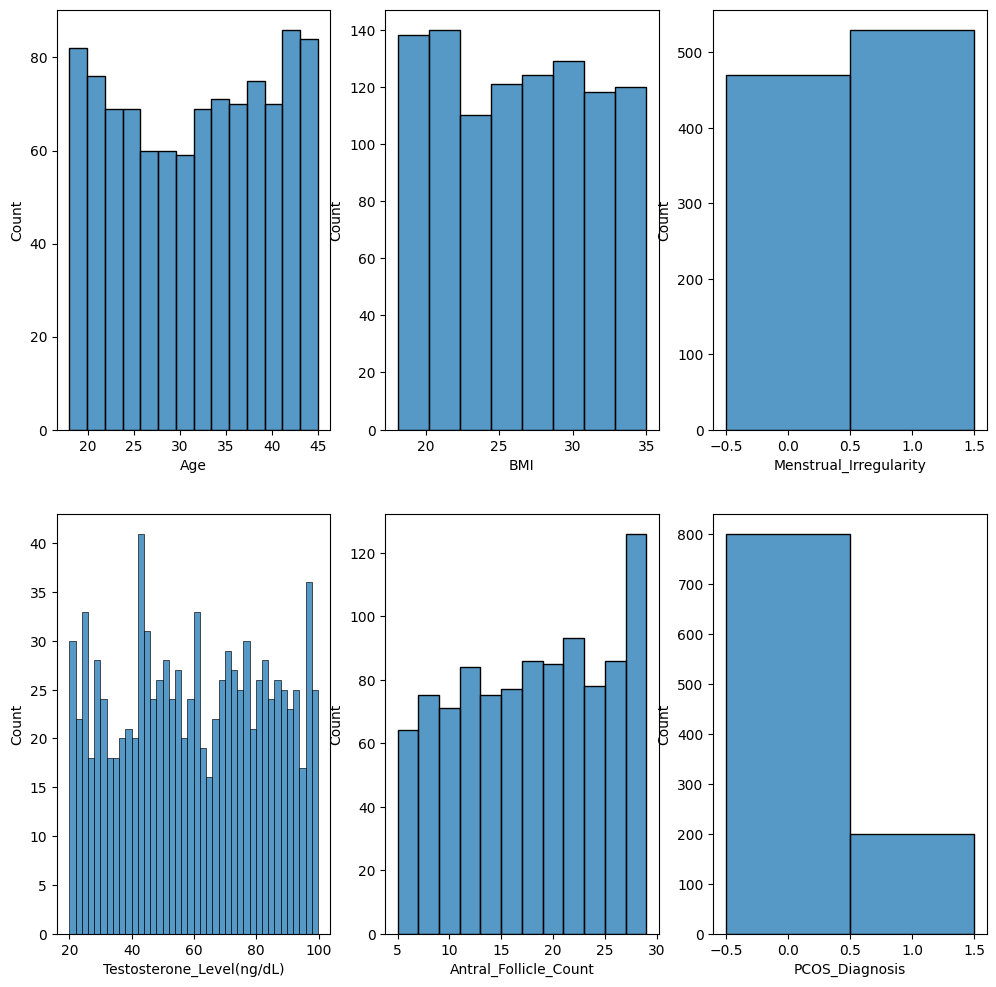

In [89]:
features = ["Age", "BMI", "Menstrual_Irregularity", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]

fig, axes = plt.subplots(2,3,figsize=(12,12))
i = 0
j = 0

for feature in features: 
    sns.histplot(pcos, x=feature, binwidth=2, ax=axes[j,i])
    if i == 2:
        i = 0
        j = 1
    else:
        i += 1

sns.histplot(pcos, x="PCOS_Diagnosis", binwidth=1, ax=axes[1,2])
plt.show()

Next we plot the distribution of all non-target features indicating in each graph the distribution of PCOS within this category. 

From these we see that indicators of PCOS can be BMI over 25, mentrual irregularity, testosterone levels above 40 and high follicle count. 

PCOS diagnosis seems to be quite evenly distributed across age groups. 

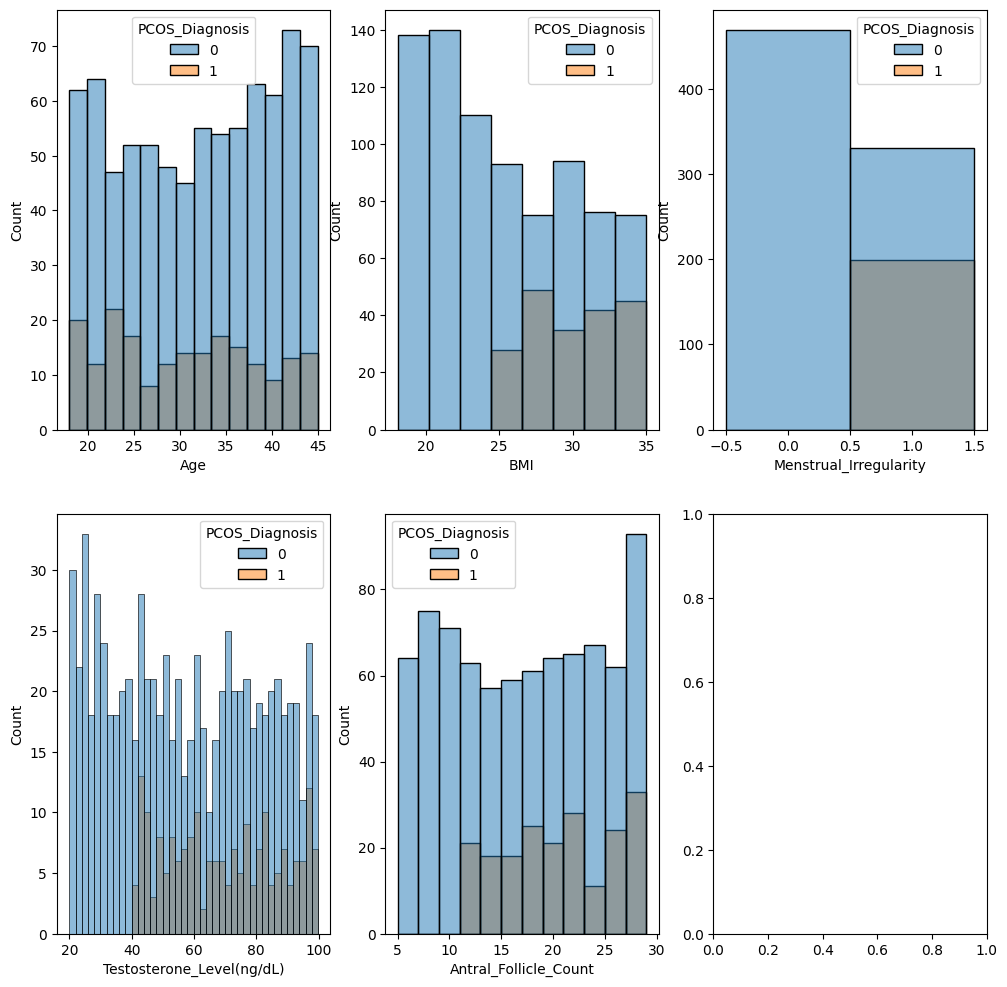

In [88]:
features = ["Age", "BMI", "Menstrual_Irregularity", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]

fig, axes = plt.subplots(2,3,figsize=(12,12))
i = 0
j = 0

for feature in features: 
    sns.histplot(pcos, x=feature, binwidth=2, ax=axes[j,i], hue="PCOS_Diagnosis")
    if i == 2:
        i = 0
        j = 1
    else:
        i += 1
    
plt.show()

In [68]:
# fig, axes = plt.subplots(2,3,figsize=(10,10))
# i = 0
# j = 0

# for feature in features: 
#     sns.violinplot(pcos, x=feature, y="PCOS_Diagnosis", ax=axes[j,i],)
#     if i == 2:
#         i = 0
#         j = 1
#     else:
#         i += 1
    
# plt.show()


The blow bar plots show what we also saw indicated in the visualizations above: that PCOS seems to be associated with higher levels of testsosterone, follicle count and BMI. It does not however seem to be associated with high age. 

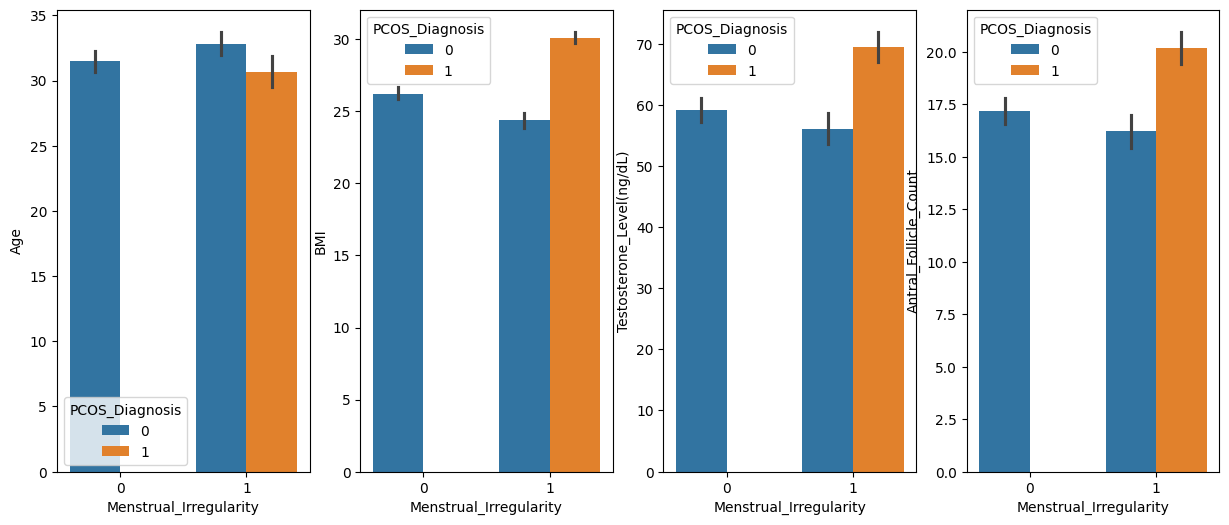

In [91]:
fig, axes = plt.subplots(1,4,figsize=(15,6))
# fig, axes = plt.subplots(1,4,figsize=(12,12))

i = 0

for feature in ["Age", "BMI", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]:
    sns.barplot(pcos, x='Menstrual_Irregularity', y = feature, hue="PCOS_Diagnosis", ax=axes[i],)
    i +=1
    
plt.show()

## Preprocessing for modelling

Target variable: PCOS_Diagnosis

Classification problem because target variable is categorical

Need to: 
- split into test and train data (stratify on behalf of PCOS diagnosis)
- get dummies for categorical data
- handle class imbalance

Baseline model: 
- KNeighborsClassifier

Comparison model: 
- a tree model?
